In [10]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Preetham Madhamsetty\Desktop\IS733\Baltimore911.csv', low_memory=False)

In [11]:
df.shape

(292761, 16)

In [12]:
import ydata_profiling as pp

df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Here are some surprising, strange, and unique observations from the data profile:

High Percentage of Missing Data:

Several variables have a significant amount of missing data, such as Weapon (79% missing), Inside/Outside (11.5% missing), vri_name1 (88.2% missing), and Location 1 (100% missing). These high missing percentages can impact the quality and completeness of any analysis or predictive modeling using this dataset.
Duplicate Rows:

The dataset contains 8,584 duplicate rows, which is 2.9% of the total records. Duplicate records can skew analysis results and indicate potential data quality issues or incorrect logging processes.
Unsupported and Rejected Data:

The column Location 1 is marked as unsupported, with 100% missing values, and has been rejected for analysis. The presence of this variable without data makes it unusual. It might have been meant for geospatial information that wasn’t properly captured.
Time Anomaly in CrimeTime:

The minimum and maximum times in the CrimeTime field indicate the presence of a future date, specifically September 29, 2024, which doesn't align with the overall timeline of the dataset. This could be due to an erroneous data entry.
Imbalance in Weapon Categories:

A high percentage of records in the Weapon category are missing, but among the provided values, firearms account for the majority (29,036 out of 292,761 total incidents), which is significant compared to other weapons like knives and hands.
Distinct Counts in Description Field:

The Description field only contains 14 distinct categories, with Larceny and Common Assault being the most common crime types. This suggests a concentrated focus on specific types of crimes, even though the dataset spans a large number of records.
Negative Longitude Values:

Nearly all the Longitude values (99.4%) are negative, which makes sense since the data likely corresponds to a region in the Western Hemisphere. However, it highlights how specific the dataset is in terms of geography.
Extreme Variance in CrimeTime and CrimeDate:

The CrimeDate field spans several decades (from October 30, 1963, to February 8, 2020), but the CrimeTime field has a much smaller range (minimum and maximum both on September 29, 2024). This inconsistency in time variables suggests possible data entry errors or misaligned data sources.
These issues indicate potential problems in the data's quality, consistency, and accuracy, which should be addressed before using the dataset for analysis or modeling.


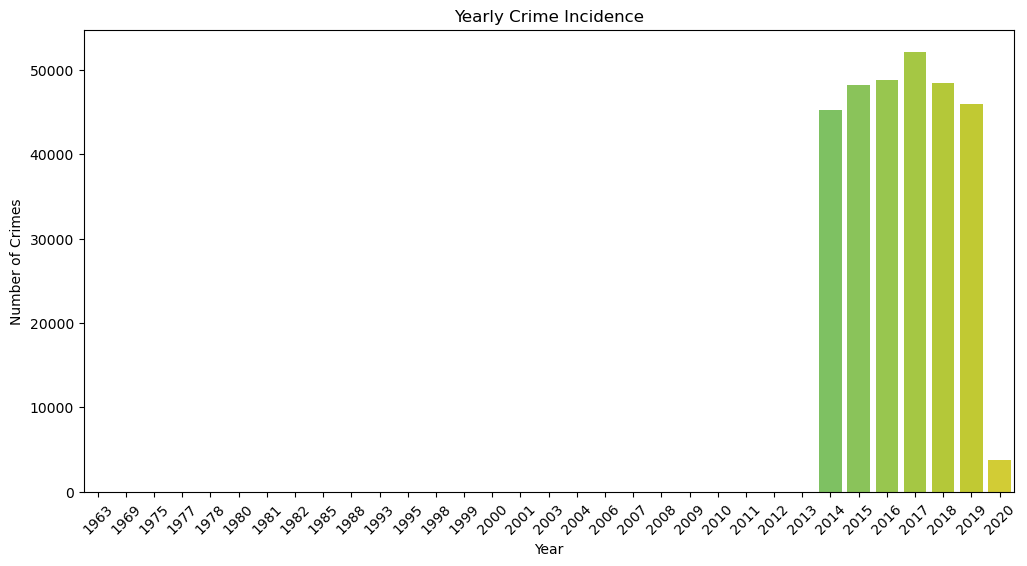

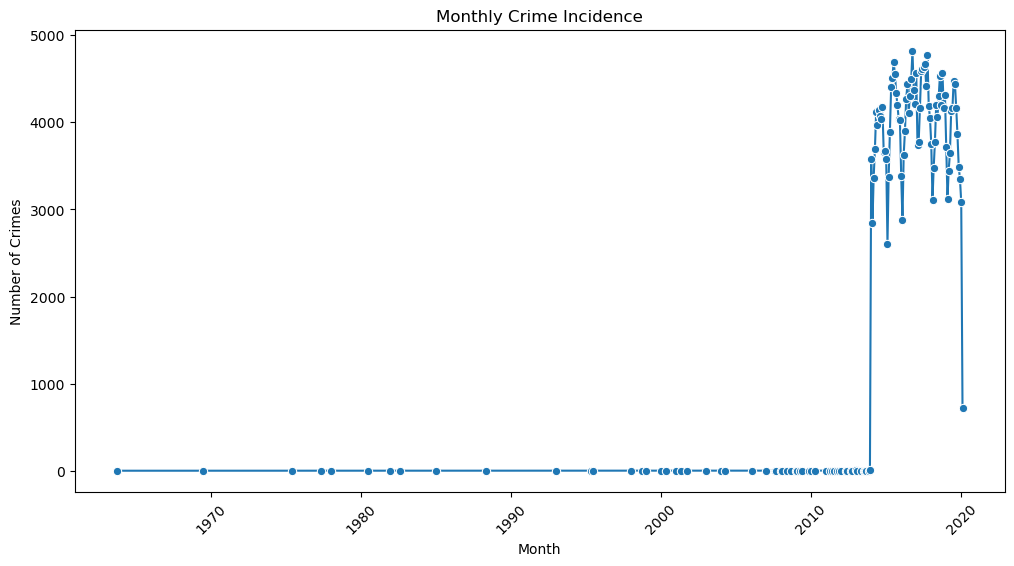

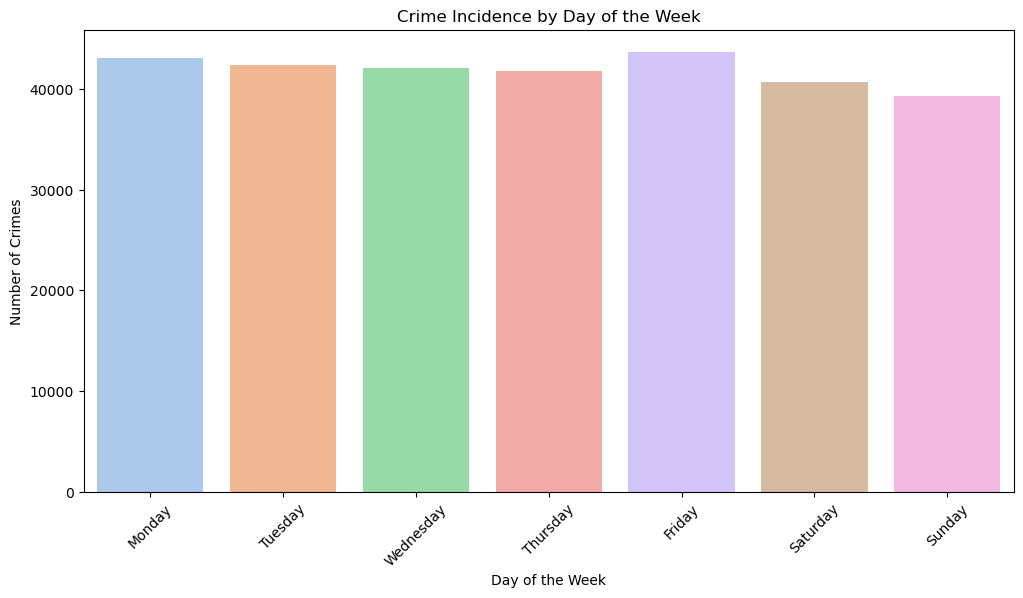

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Ensure 'CrimeDate' is in datetime format
df['CrimeDate'] = pd.to_datetime(df['CrimeDate'])

# Extract year, month, and day of the week
df['Year'] = df['CrimeDate'].dt.year
df['Month'] = df['CrimeDate'].dt.month
df['DayOfWeek'] = df['CrimeDate'].dt.day_name()

# Aggregating data for yearly analysis
yearly_crime = df['Year'].value_counts().sort_index()

# Aggregating data for monthly analysis
monthly_crime = df.groupby(['Year', 'Month']).size().reset_index(name='Count')

# Aggregating data for day of the week analysis
dow_crime = df['DayOfWeek'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plotting Yearly Crime Incidence
plt.figure(figsize=(12, 6))
sns.barplot(x=yearly_crime.index, y=yearly_crime.values, palette='viridis')
plt.title('Yearly Crime Incidence')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()

# Plotting Monthly Crime Incidence
plt.figure(figsize=(12, 6))
monthly_crime['Date'] = pd.to_datetime(monthly_crime[['Year', 'Month']].assign(DAY=1))
sns.lineplot(data=monthly_crime, x='Date', y='Count', marker='o')
plt.title('Monthly Crime Incidence')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()

# Plotting Day of the Week Crime Incidence
plt.figure(figsize=(12, 6))
sns.barplot(x=dow_crime.index, y=dow_crime.values, palette='pastel')
plt.title('Crime Incidence by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()


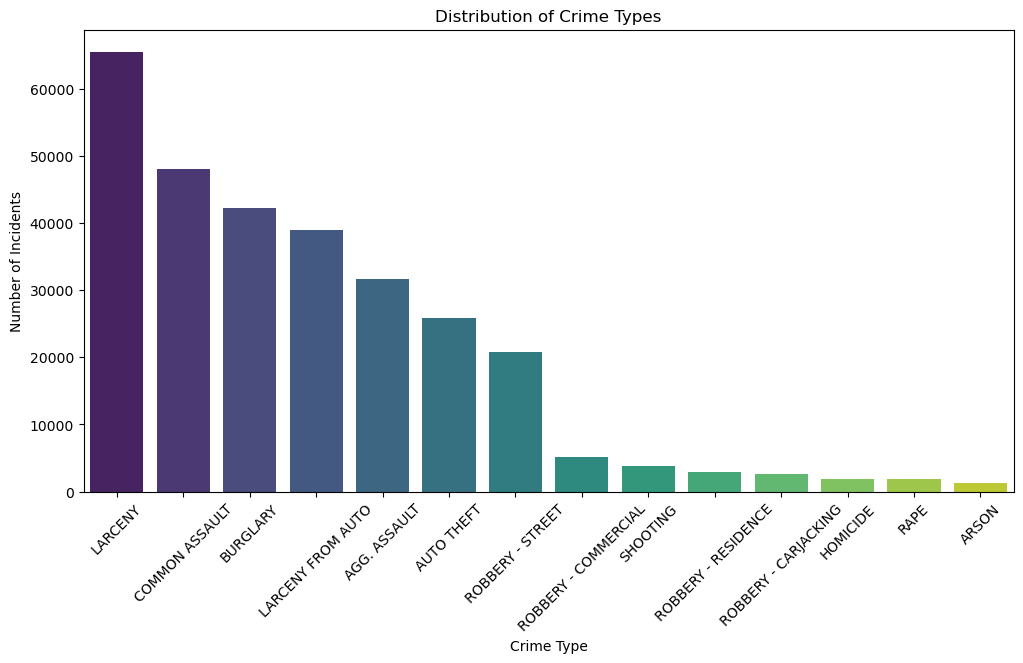

In [13]:

# Aggregating data for crime type distribution
crime_type_counts = df['Description'].value_counts()

# Plotting the distribution of crime types
plt.figure(figsize=(12, 6))
sns.barplot(x=crime_type_counts.index, y=crime_type_counts.values, palette='viridis')
plt.title('Distribution of Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()


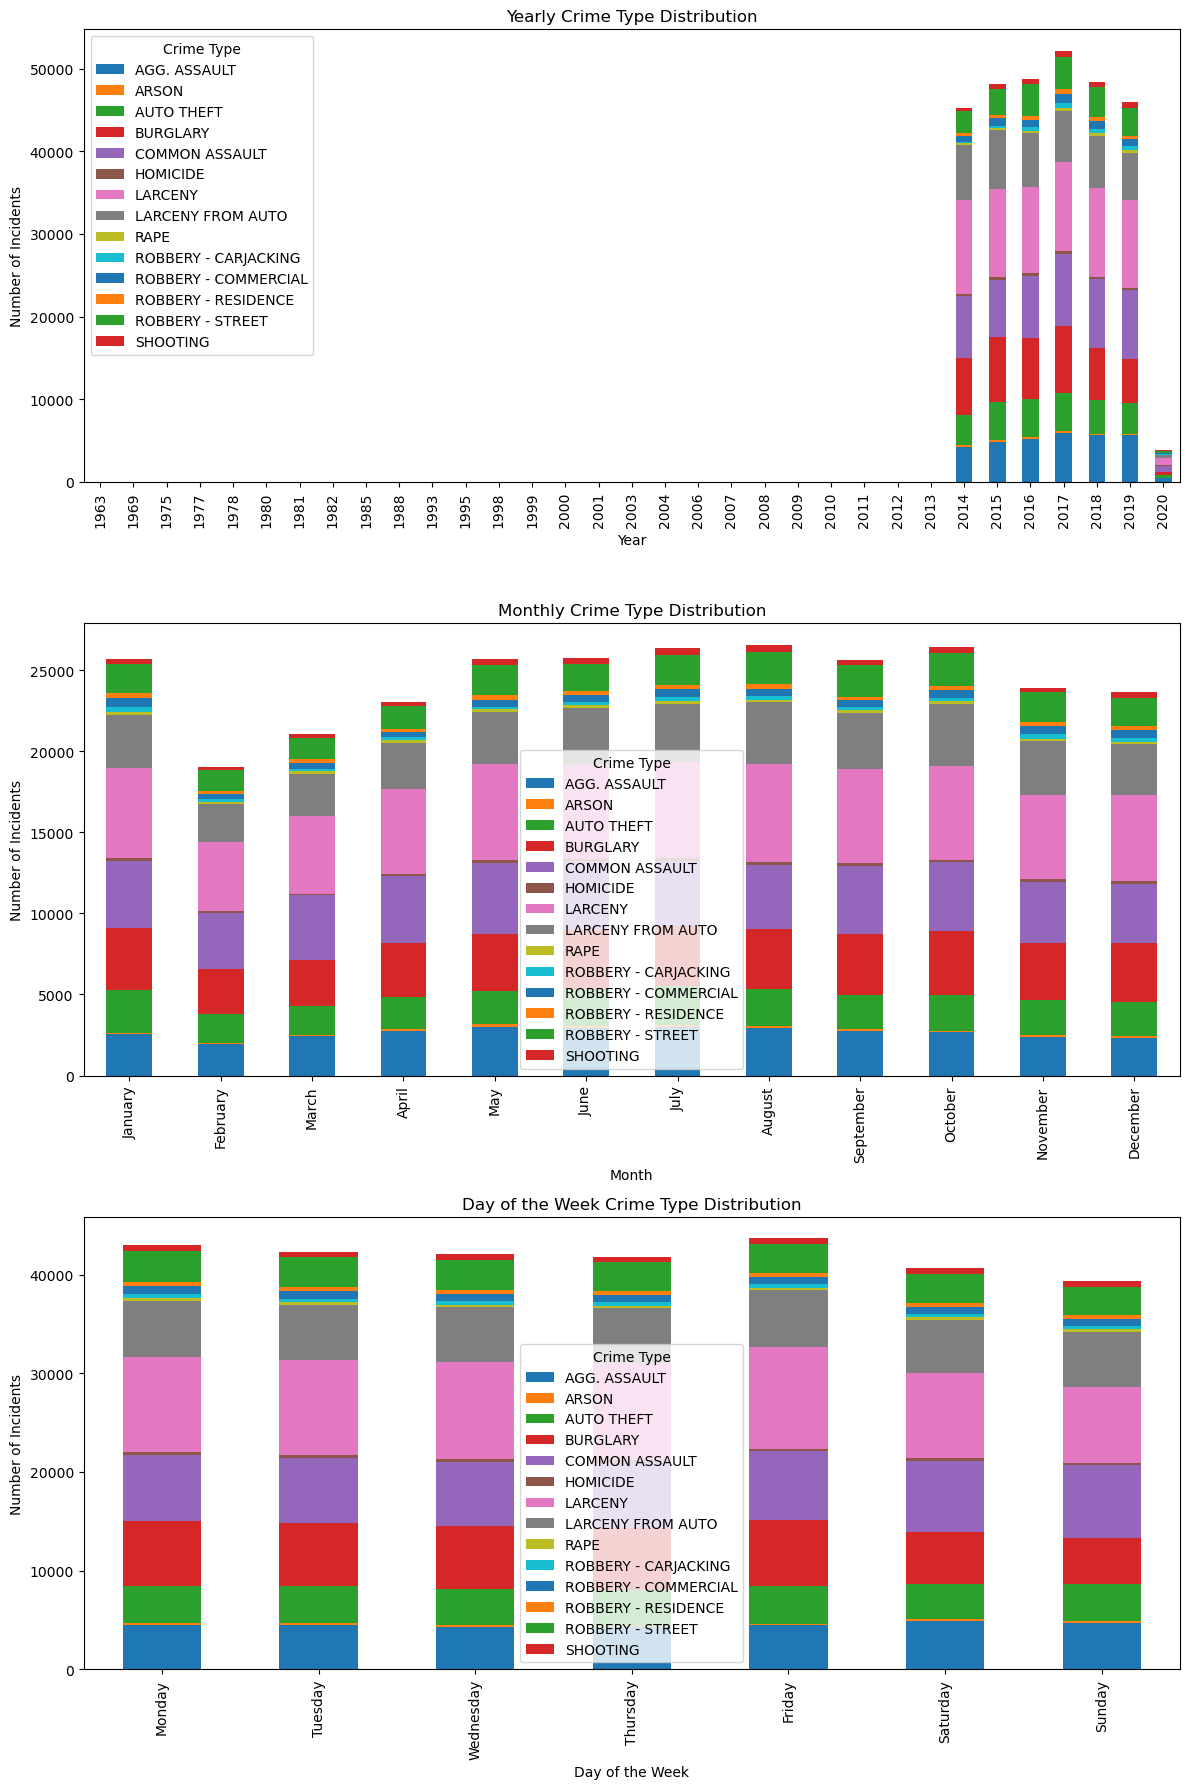

In [14]:
# Ensure 'Date' is a datetime object
df['CrimeDate'] = pd.to_datetime(df['CrimeDate'])

# Extract year, month, and day of the week
df['Year'] = df['CrimeDate'].dt.year
df['Month'] = df['CrimeDate'].dt.month_name()  # Get the name of the month
df['DayOfWeek'] = df['CrimeDate'].dt.day_name()  # Get the name of the day

# Create plots
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Yearly Distribution
yearly_counts = df['Description'].groupby([df['Year'], df['Description']]).size().unstack().fillna(0)
yearly_counts.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Yearly Crime Type Distribution')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Incidents')
axes[0].legend(title='Crime Type')

# Monthly Distribution
monthly_counts = df['Description'].groupby([df['Month'], df['Description']]).size().unstack().fillna(0)
monthly_counts = monthly_counts.reindex(['January', 'February', 'March', 'April', 'May', 'June', 
                                          'July', 'August', 'September', 'October', 'November', 'December'])
monthly_counts.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Monthly Crime Type Distribution')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Number of Incidents')
axes[1].legend(title='Crime Type')

# Day of the Week Distribution
day_counts = df['Description'].groupby([df['DayOfWeek'], df['Description']]).size().unstack().fillna(0)
day_counts = day_counts.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
day_counts.plot(kind='bar', stacked=True, ax=axes[2])
axes[2].set_title('Day of the Week Crime Type Distribution')
axes[2].set_xlabel('Day of the Week')
axes[2].set_ylabel('Number of Incidents')
axes[2].legend(title='Crime Type')

# Adjust layout
plt.tight_layout()
plt.show()


In [16]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px
import plotly.graph_objects as go

# Convert 'Date' to datetime and extract relevant fields
df['CrimeDate'] = pd.to_datetime(df['CrimeDate'])
df['Year'] = df['CrimeDate'].dt.year
df['Month'] = df['CrimeDate'].dt.month_name()
df['Day'] = df['CrimeDate'].dt.day_name()

# Initialize the Dash app
app = Dash(__name__)

# Define app layout
app.layout = html.Div([
    html.H1("Crime Data Dashboard"),
    
    # Filters
    html.Div([
        dcc.Dropdown(
            id='location-filter',
            options=[{'label': loc, 'value': loc} for loc in df['Location'].unique()],
            multi=True,
            placeholder="Select Location"
        ),
        dcc.DatePickerRange(
            id='date-picker',
            start_date=df['CrimeDate'].min(),
            end_date=df['CrimeDate'].max(),
            display_format='YYYY-MM-DD'
        )
    ]),
    
    # Map Visualization
    dcc.Graph(id='crime-map'),
    
    # Time Series Chart
    dcc.Graph(id='time-series'),
    
    # Crime Type Distribution
    dcc.Graph(id='crime-type-dist')
])

# Callbacks to update the graphs based on user input
@app.callback(
    Output('crime-map', 'figure'),
    Output('time-series', 'figure'),
    Output('crime-type-dist', 'figure'),
    Input('location-filter', 'value'),
    Input('date-picker', 'start_date'),
    Input('date-picker', 'end_date')
)
def update_graphs(selected_locations, start_date, end_date):
    # Filter the DataFrame
    filtered_df = df[
        (df['CrimeDate'] >= start_date) & 
        (df['CrimeDate'] <= end_date) & 
        (df['Location'].isin(selected_locations) if selected_locations else True)
    ]
    
    # Map Visualization
    map_fig = px.scatter_mapbox(
        filtered_df,
        lat='Latitude',
        lon='Longitude',
        color='Description',
        size_max=15,
        zoom=10,
        title='Crime Incidents Map'
    )
    map_fig.update_layout(mapbox_style='open-street-map')
    
    # Time Series Visualization
    time_series_df = filtered_df.groupby('CrimeDate').size().reset_index(name='counts')
    time_series_fig = go.Figure()
    time_series_fig.add_trace(go.Scatter(x=time_series_df['CrimeDate'], y=time_series_df['counts'], mode='lines+markers'))
    time_series_fig.update_layout(title='Crime Incidents Over Time', xaxis_title='Date', yaxis_title='Number of Incidents')

    # Crime Type Distribution
    crime_type_counts = filtered_df['Description'].value_counts()
    crime_type_fig = px.bar(crime_type_counts, x=crime_type_counts.index, y=crime_type_counts.values, title='Crime Type Distribution')
    
    return map_fig, time_series_fig, crime_type_fig

if __name__ == '__main__':
    app.run_server(debug=True)
